In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

def grid_search(X, y, params, random=False, kfold=None):
    """will do a grid search of all combinations of the paramaters listed and return the best params"""
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2)
    if not kfold:
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2) # tries 5 random splits of the data for the crossvalidation param
    if random:
        grid = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=20, n_jobs=-1)
    else:
        grid = GridSearchCV(xgb, params, cv=kfold, n_jobs=-1)
        
    grid.fit(X, y)
    print(f"Best param: {grid.best_params_}")
    print(f"Best score: {grid.best_score_}")
    


In [7]:
df_pro = pd.read_csv("MarksClean2.csv")

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from yellowbrick.classifier import ConfusionMatrix

#option to select differenct columns for model
USE_COLUMNS = [
    # 'Raceid',
    # 'Ability', 
    # 'Fitness',
    # 'Conditions', 
    # 'Market', 
    # 'Rank',
    'Form', 
    'Speed', 
    # 'OddsPos', 
    'Wins', 'T14Win', 'T30Win',  'T60Win',  
    
    'HCrsWin', 'HGngWin', "HDisWin", "HClassWin", 'TCrseWin', 'TRTypeWin',
    'TJWin', 'JCrseWin',  'JRTypeWin', 'J14Win', 
    'J30Win',  'J60Win',   'OCrseWin', 'ORTypeWin', 'O14Win', 'O30Win',
    'HHcapWin', 'JBreakWins',   'JDebutWins',  'JHGBackWins',  'JHGFirstWins',
    'O60Win', 'SCrseWin',  'SRTypeWin',  'S14Win', 'S30Win', 'S60Win', 
    'SRGoingWin', 'SRDistanceWin', 'JHGHcp1sttWins',
    'TBreakWins',  'TDebutWins',  'THGBackWins',
    'THGFirstWins', 'THGHcp1sttWins', 'HorseTypeWins', 'JockeyTypeWins', 'TrainerTypeWins',
    'ORWins',  'ORPlaced', 'ORPlaces', 'LastRaceWins', 
    'LastPerf', 'LastPerf_2','JAllow',  
    'FormRank', 'SpeedRank', 'ORRank',  'WeightRank',  
    'FormImproved', 'SpeedImproved', 'ORImproved',  
    'ORWinner',  'SameJockey', 
    'HighClassWin', 'GradeWinner', 'HighGradeWinner',
    'TopRTypeJockey', 'ShrewdTrainer', 'TopRTypeTrainer', 
    'NewTrain', 'Noted', 'LastBestSpeed',  'LastBestSpeed3', 'LastBestForm', 'LastBestForm3',
    'Gambled', 'FutureEntry',
    'LastTimeWin', 'LastWin', 'RunsSinceGelded', 'SameCourse_2', 'Penalty',
    'SRClassWin',
    # 'DrawWins',    
    'LastWon', 'RunsSince', 'HcapCount', 'HWM', 'CatClassWinner',
    'CatGradeWinner', 'SameCourse',
    'WellHcap', 'TForm', 'JForm', 
    # 'GreenShoes', 'AmberShoes', 'RedShoes',
    # 'Tips', 
    # 'Select', 
    # 'Short', 
    'RPBlue',
    'LastRan', 
    'OR', 'Last_OR', 'LastWM',
    # 'DecOdds',
    # 'MinOdds', 'MaxOdds', 'AvgOdds', 
    # 'DecRunners',
    #  'Travelled',
    # 'JockeyRides', 'TrainerRuns', 
    # 'Runs', 'HCrsRun', 'HGngRun',  'HDisRun', 'HClassRun', 'TCrseRun', 'TRTypeRun',
    # 'T14Run', 'T60Run', 
    # 'HTotPrize', 
    # 'TJRun',  'JCrseRun',  'JRTypeRun',
    # 'J14Run', 'J30Run', 'J60Run',
    # 'OCrseRun',  'ORTypeRun', 'O30Run', 
    #  'O60Run', 'SCrseRun', 'SRTypeRun', 'S14Run',
    # 'S30Run', 'S60Run', 
    # 'HHcapRun', 'JBreakRuns', 'JDebutRuns', 'JHGBackRuns', 'BrkRuns',
    # 'NumPlaces', 
    # 'SRGoingRun',  'SRDistanceRun',  'SRClassRun',   'DrawRuns',
    # 'JHGFirstRuns',  'JHGHcp1sttRuns',
    # 'TBreakRuns', 'TDebutRuns', 'THGBackRuns',
    #  'THGFirstRuns',  'THGHcp1sttRuns',  'HorseTypeRuns', 'JockeyTypeRuns', 'TrainerTypeRuns', 
    'Position',
]
df = df_pro#[USE_COLUMNS]
df.drop(["RaceCode","SubType", "Unnamed: 0"], axis = "columns", inplace= True) # drop data types that are objects and not of use
df.loc[df["Position"] > 14, "Position"] = 0
data = df.iloc[:, :-1]
target = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=2) # split data into into test and train
y_test.sort_index(inplace =True) # purely for the roi func later on
X_test.sort_index(inplace = True)
testOdds = df_pro[df_pro.index.isin(y_test.index)]["DecOdds"] # purely for roi func later on
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# xgb = XGBClassifier()
# params = {"n_estimators":[50, 100, 300],
#               "subsample": [0, 5, 0, 8, 1],
#               "max_depth": [3, 5, 7],
#               "learning_rate": [0, 1, 0, 0.01, 0.3],}
# xgb_cv_model = GridSearchCV(xgb, params, cv = 2, n_jobs=-1, verbose=2).fit(X_train, y_train)
# print(xgb_cv_model.best_params_)
# params =  {"n_estimators": [100, 200, 400, 800]}
# params={'min_child_weight':[2, 3, 4]} 
# grid_search(data, target, params)
# Optimised Parameters
params = {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'subsample': 1,
              'gamma': 0.1, 'min_child_weight': 3}
model = XGBClassifier()
# Crossval test
# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
# scores = cross_val_score(model, data, target, cv=kfold)
# print('Accuracy:', np.round(scores, 2))
# print('Accuracy mean: %0.2f' % (scores.mean()))
# # End Crossval test
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('Score: ' + str(score)) 
print(classification_report(y_test, y_pred))
cm = ConfusionMatrix(model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()
 


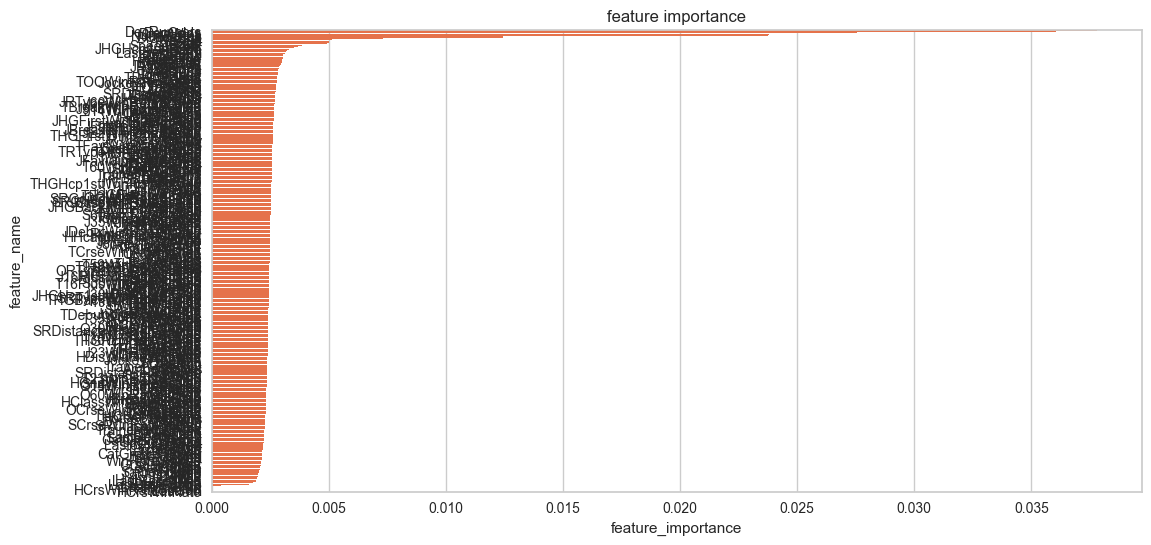

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.figure(figsize=(12, 6))
df_plt = pd.DataFrame({'feature_name': X_train.columns, 'feature_importance': model.feature_importances_})
df_plt.sort_values('feature_importance', ascending=False, inplace=True)
sns.barplot(x="feature_importance", y="feature_name", data=df_plt,color='#FF6631')
plt.title('feature importance')
plt.show()

In [7]:
def roi(odds, position, prediction):
    """return on investment if the 1st place prediction was made based on the odds of said horse"""
    frame = {"oods": np.array(odds),
             "position" : np.array(position),
             "prediction":  np.array(prediction)}
    frame = pd.DataFrame(frame)
    frame = frame.drop(frame[frame["prediction"] != 1].index)
    bets = len(frame)
    frame2 = frame.drop(frame[frame["position"] != frame["prediction"]].index)
    returns = frame2["oods"].sum()
    return returns - bets, bets, frame


In [8]:
returns, bets, frame = roi(testOdds, y_test, y_pred)
print(returns, bets)

-1034.880000000001 9492


In [42]:
import pickle
with open("modelSaves.obj", "wb") as outFile:
    pickle.dump(model, outFile)
